<html>
<head>
	<title></title>
</head>
<body>
<h2 style="text-align: center;line-height: 120%;">ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ ОБРАЗОВАТЕЛЬНОЕ УЧРЕЖДЕНИЕ ВЫСШЕГО ОБРАЗОВАНИЯ НАЦИОНАЛЬНЫЙ ИССЛЕДОВАТЕЛЬСКИЙ УНИВЕРСИТЕТ «МОСКОВСКИЙ ЭНЕРГЕТИЧЕСКИЙ ИНСТИТУТ» Кафедра «РЗиАЭ»</h2>
<h2 style="text-align: center;line-height: 20%;">Лабораторная работа №2</h2>

<h3 style="text-align: center;line-height: 80%;"><em>Исследование муравьиного алгоритма для решения задачи коммивояжера </em></h3>

<p style="text-align: right;line-height: 40%;">Выполнил: студент группы Э-13м-19</p>

<p style="text-align: right;line-height: 40%;">Шмыков А.Д.</p>

<p style="text-align: right;line-height: 40%;">Проверил: Грачева Н.П.</p>
<h4 style="text-align: center;line-height: 100%;"><em> Москва, 2020</em></h3>
</body>
</html>

Импорт библиотек и загрузка матрицы путей

In [414]:
import numpy as np
import random as r
import time
import math
d = np.load('C:/Users/1/Downloads/Task28.npy')
print(d)

[[ 0 28 25  5 51 81 31 43 26 77]
 [28  0 20 65 86 72 96  2 55 26]
 [25 20  0 90 69 53 33 40 77 52]
 [ 5 65 90  0 24 31 23 71 30 66]
 [51 86 69 24  0 15 39 59 20 72]
 [81 72 53 31 15  0 11 61 92 68]
 [31 96 33 23 39 11  0 84 49  6]
 [43  2 40 71 59 61 84  0 37 14]
 [26 55 77 30 20 92 49 37  0 31]
 [77 26 52 66 72 68  6 14 31  0]]


**Алгоритм полного перебора.** Самый неоптимальный, однако может гарантированно найти глобальный минимум. Использовался, чтоб найти наименьший и пятый путь, а также время, чтоб сравнить с временем муравьиных алгоритмов. Также для 11 и более городов алгоритм никогда не выполнится, т.к займёт очень много времени

Наименьшая длина пути:  148

Наименьший путь:  [1, 4, 9, 5, 6, 7, 10, 8, 2, 3, 1]

Номер итерации:  560260

Время полного перебора :  370.1248276233673

Пятая длина:  179


In [6]:
def brute_force(d):
    start_time = time.time()
    cities=[]
    dist=[] #массив расстояний
    distance=0
    routes=[] #все маршруты
    ite=[]
    n=math.factorial(len(d))
    for i in range (0,n):
        for j in range (2,len(d)+1): #каждую итерацию заполняем массив городами
            cities.append(j)
        routes.append([])
        routes[i].append(1) #назначаем стартовый город
        
        for j in range(0,len(cities)+1):
            if len(cities)>0:
                cur_city=r.choice(cities)
                distance+=d[cur_city-1,routes[i][j]-1]
                cities.remove(cur_city)
                routes[i].append(cur_city)
            else:
                routes[i].append(1) #идём домой
                distance+=d[0, cur_city-1] #берём расстояние до дома
                dist.append(distance)
                ite.append(i)
                distance=0
                #Если делать проверку, то будет очень долго
#                 check = [x for a, x in enumerate(routes) if x in routes[:a]] #проверка на совпадение путей
#                 if  check:
#                     n = n + 1 #если есть совпадение, то добавляем одну итерацию
                    
                

    min_dist=min(dist)
    min_route=routes[dist.index(min_dist)]
    iteration=ite[dist.index(min_dist)]
    dist.sort(); #Сортируем по возрастанию
    dist=list(set(dist)) #Удаляем повторы
    min_dist5=dist[4]

    print("The shortest distance: ",min_dist)
    print("The shortest route: ",min_route)
    print("Iter: ",iteration)
    print("Sorting time : ", (time.time() - start_time))
    print("5th dist: ",min_dist5)
    

            

Наименьшая длина пути:  148
Наименьший путь:  [1, 4, 9, 5, 6, 7, 10, 8, 2, 3, 1]
Номер итерации:  560260
Время полного перебора :  370.1248276233673
Пятая длина:  179


Создание вспомогательных матриц и дано

In [415]:

visibility = 1 / d #Матрица видимости 1/дистанция
visibility[visibility == np.inf] = 0 #чтоб не учитывались в probs

Q=6666 #кол-во феромона на весь путь

route = np.zeros((m, n+1)) #Матрица пути. 10 муравьёв, 11 городов, т.к надо вернуться 
route[:, 0] = 1 #назначаем стартовый город
print(route)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


C:\Games\Anaconda1\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


При выборе следующей вершины для посещения муравьи опираются на значения концентрации феромона (pherom) на исходящих ребрах и на значения длин (visibility) этих ребер. 
Вероятность (probs) перемещения в j-ую вершину определяется формулой:
![Ttile](https://imgur.com/hvNQncN.png)

Функция Ant_movement осуществляет проход муравьев по городам и обновляет матрицы пути и расстояний

In [416]:
def Ant_movement(m,n,d,route,visibility,alpha,beta,pherom,dist):
   
    for i in range(m): #цикл по муравьям
        temp_v = np.array(visibility)  # для каждого мур.копируем матрицу, чтоб потом с ней работать в городах,
                                       #иначе 1й мур.её обнулит и для других она станет нулевой
        
        for j in range(n-1): #цикл по 9-ти городам

            cur_city = int(route[i, j]-1)  # -1 т.к город 1, но заполняем матрицу с 0
            temp_v[:, cur_city] = 0  # обнуляем матрицу с расстоянии для каждого города, если 0, то город посещен
            # и в prob не будет учтен
            
            numerators = (pow(pherom[cur_city, :], alpha)) * (pow(temp_v[cur_city, :], beta))
            den = float(sum(numerators))         # у каждого города свой массив probs
            probs = np.cumsum(numerators / den)  # шансы. посещенные города математически не учитываются при рандоме
                                                   # тк их шансы становятся равными напр [0,0.1,0.1,0.2...]
            random = r.random()
            
            for prob in range(len(probs)):
                if probs[prob] > random:
                    dist[i, j] += d[list(probs).index(probs[prob]), cur_city]#добавили расстояние до выбр.города
                    cur_city = ( list(probs).index(probs[prob]) ) + 1 # взяли номер города
                    break
            route[i, j + 1] = cur_city #добавили в матрицу пути выбранный город 
            if j == 8:# если всё прошли
                route[i, -1] = 1#идём домой
                dist[i, -1] = d[0, cur_city-1]#учитываем расстояние от посл.города до дома  

**Реализация обычного муравьиного алгоритма.** Обновление феромона происходит после прохождения всеми муравьями всех городов, т.е в конце итерации по формуле:
![Ttile](https://imgur.com/PUw9G6c.png)
где ρ — коэффициент испарения феромона, Q — некоторая фиксированная величина (количество феромона на весь путь), D – общая длинна пути.
Таким образом, чем короче путь k-го муравья, тем больше феромона он оставит на ребрах, по которым он ходил.

In [417]:
def ant_general(m,n,e,d,route,visibility,alpha,beta,Q):
    d_final=[] #массив, в который записывается наим.расстояние за итерацию
    r_final=[] #массив, в который записывается наим.путь за итерацию
    pherom = (np.ones(d.shape)) / 10  # Каждый раз обнуляем феромоны, чтоб функция не использовала заполненную матрицу 
    start = time.perf_counter() #Время старта
    alh_time=0
    for ite in range(49999):

        dist = np.zeros((m, n)) #Матрица, в которой расстояния между городами для 10ти мур.
        di= np.zeros(n) #Матрица ,где будут записаны суммы расстояний каждого муравья
        
        Ant_movement(m,n,d,route,visibility,alpha,beta,pherom,dist)
        
        for i in range(len(dist)):
            di[i]=np.sum(dist[i,:]) #считаем сумму длин у каждого мур
        d_final.append(di.min())#добавляем наим.длину из всех
        r_final.append(list(route[list(di).index(di.min()),:]))#добавляем наим.путь из всех. list нужен, чтоб избежать проблем
        
        if (d_final[ite]<=179):
            end=time.perf_counter()
            alh_time=end-start
            print("Stop.",("Distance:",d_final[ite]),("Route:",np.around(r_final[ite])),("time:",alh_time), ("Iter:",ite), sep='\n')
            break
            
        for i in range(len(route)): #Обновляем матрицу феромон после фул.итерации
            for j in range(len(route)):
                pherom[int(route[i,j]-1),int(route[i,j+1]-1)]=(e*pherom[int(route[i,j]-1),int(route[i,j+1]-1)]+Q/di[i])
                pherom[int(route[i,j+1]-1),int(route[i,j]-1)]=pherom[int(route[i,j]-1),int(route[i,j+1]-1)] #чтоб менялось в двух местах
    
    return alh_time



        
       

**Реализация элитного муравьиного алгоритма.** Обновление феромона происходит после прохождения всеми муравьями всех городов, т.е в конце итерации, но только для лучшего пути по формуле:
![Ttile](https://imgur.com/XSUee4f.png)
Видно, что нужно ограничить максимальное кол-во феромона на участке, чтоб дать шанс "менее удачным" маршрутам.
Учет только лучшего из найденных путей приводит к более быстрой сходимости муравьиного алгоритма, но результатом скорее будет некоторый локальный экстремум целевой функции. 

In [388]:
def ant_elite(m,n,e,d,route,visibility,alpha,beta,Q):
    d_final=[]
    r_final=[]
    pherom = (np.ones(d.shape)) / 10
    start = time.perf_counter()
    alh_time=0
    for ite in range(49999):

        dist = np.zeros((m, n))
        di= np.zeros(m)
    
        Ant_movement(m,n,d,route,visibility,alpha,beta,pherom,dist)
    
        for i in range(len(dist)):
            di[i]=np.sum(dist[i,:]) 
        
        min_dist=(di.min()) #наим.длина из 10-ти длин
        min_route=list((route[list(di).index(di.min()),:])) #наим.путь из 10-ти путей
        d_final.append(min_dist)
        r_final.append(min_route)
        if (d_final[ite]<=179):
            end=time.perf_counter()
            alh_time=end-start
            #print("Критерий останова.",("Найденная длина:",d_final[ite]),("Найденный путь:",np.around(r_final[ite])),("time:",alh_time), sep='\n')
            break
        for j in range(len(min_route)-1)  : #Обновляем матрицу феромон только для лучшего пути
            pherom[int(min_route[j]-1),int(min_route[j+1]-1)]=(e*pherom[int(min_route[j]-1),int(min_route[j+1]-1)]+Q/min_dist)
            pherom[int(min_route[j+1]-1),int(min_route[j]-1)]=pherom[int(min_route[j]-1),int(min_route[j+1]-1)] 
            if pherom[int(min_route[j]-1),int(min_route[j+1]-1)]>90: #ограничиваем нарастание феромон
                pherom[int(min_route[j]-1),int(min_route[j+1]-1)]=90

    return alh_time


**Реализация алгоритма муравьиной колонии.** Помимо глобального обновления феромона после завершения каждой итерации алгоритма, вводится дополнительное локальное обновление, выполняемое каждым муравьем сразу же после прохода по ребру (i, j) по формуле:
![Ttile](https://imgur.com/gc3abch.png)
Цель локального обновления является ослабление ребра, по которому только что прошел муравей, для того чтобы следующие за ним муравьи с большей вероятностью выбрали другие ребра для продолжения маршрута.
Для выбора нового ребра каждый муравей использует схему псевдо - случайного пропорционального выбора: если случайное число q [0, 1] меньше заданного параметра q0, то выбирается ребро с максимальным уровнем феромона, в противном случае используется стандартная формула(prob).
Функцию ant_movement я не стал использовать, так как здесь присутствует локальное обновление феромон и двойной выбор пути.

In [389]:
def ant_colony(e,d,visibility,alpha,beta,Q):
    d_final=[]
    r_final=[]
    pherom = (np.ones(d.shape)) / 10
    start = time.perf_counter()
    alh_time=0

    for ite in range(49999):
        route = np.zeros((10, 11))# Для каждой итерации необходимо создавать новую матрицу
        route[:, 0] = 1           # и задавать начальный город
        dist = np.zeros((10, 10)) 
        di= np.zeros(10) 
        
        for i in range(10): 
        
            temp_v = np.array(visibility)
        
            for j in range(9):
                                 
                cur_city = int(route[i, j]-1)
                temp_v[:, cur_city] = 0 
                q=r.random()
          
                if ((q<0.5) & (j<8)):#Если город не предпоследний и q<0.5
                
                    concent=pherom[cur_city,:]#массив концентрации феромон от cur_city до остальных
                                
                    for p in range(len(route)):#проверка
                        if route[i,p]!=0:#если в route есть посещ.города, то снижаем конц.феромон
                            concent[int(route[i,p]-1)]=0.00001#чтоб путь не был выбран
            
                    m=concent.max()#берём макс.конц
                    dist[i,j]=d[cur_city,list(concent).index(m)]
                    cur_city=list(concent).index(m)+1 
                    route[i,j+1]=cur_city#записываем city с max concent
 
                else:
                    numerators = (pow(pherom[cur_city, :], alpha)) * (pow(temp_v[cur_city, :], beta))
                    den = float(sum(numerators))       
                    probs = np.cumsum(numerators / den) 

                    random = r.random()
                
                    for prob in range(len(probs)):
                        if probs[prob] > random:
                            dist[i, j] += d[list(probs).index(probs[prob]), cur_city]
                            cur_city = ( list(probs).index(probs[prob]) ) + 1
                            break
                    route[i, j + 1] = cur_city
                   
                    if j == 8:
                        route[i, -1] = 1
                        dist[i, -1] = d[0, cur_city-1]
           
            for j in range(len(route)):#локальное обновление после прохода муравья. 
                pherom[int(route[i,j]-1),int(route[i,j+1]-1)]=((1-e)*(pherom[int(route[i,j]-1),int(route[i,j+1]-1)])+e*0.1)
                pherom[int(route[i,j+1]-1),int(route[i,j]-1)]=pherom[int(route[i,j]-1),int(route[i,j+1]-1)]     
        
        for i in range(len(dist)):
            di[i]=np.sum(dist[i,:]) 
        min_dist=(di.min()) #наим.длина из 10-ти длин
        min_route=list((route[list(di).index(di.min()),:])) #наим.путь из 10-ти путей
        d_final.append(min_dist)
        r_final.append(min_route)
        
        if (d_final[ite]<=179):
            end=time.perf_counter()
            alh_time=end-start
            #print("Критерий останова.",("Найденная длина:",d_final[ite]),("Найденный путь:",np.around(r_final[ite])),("time:",alh_time), sep='\n')
            break
            
        for j in range(len(route)):#Глобальное обновление для лучшего пути на итерации.
            pherom[int(min_route[j]-1),int(min_route[j+1]-1)]=(e*pherom[int(min_route[j]-1),int(min_route[j+1]-1)]+Q/min_dist)
            pherom[int(min_route[j+1]-1),int(min_route[j]-1)]=pherom[int(min_route[j]-1),int(min_route[j+1]-1)] 

    return alh_time


Записываем в массивы время выполнения, которое меняется при изменении параметров alpha, beta, evaporation(e)

In [418]:
t_general=[]
t_elite=[]
t_colony=[]

for ab in range(2,20,1):
#for e in range(1,10,1):

    t_general.append(ant_general(10,10,0.6,d,route,visibility,ab/2,ab/2,Q))

#     t_elite.append(ant_elite(10,10,0.6,d,route,visibility,ab/2,ab/2,Q))
#     t_colony.append(ant_colony(0.6,d,visibility,ab/2,ab/2,Q))


Stop.
('Distance:', 166.0)
('Route:', array([ 1.,  4.,  7.,  6.,  5.,  9., 10.,  8.,  2.,  3.,  1.]))
('time:', 0.025487399998382898)
('Iter:', 4)
Stop.
('Distance:', 148.0)
('Route:', array([ 1.,  4.,  9.,  5.,  6.,  7., 10.,  8.,  2.,  3.,  1.]))
('time:', 0.004387200002383906)
('Iter:', 0)
Stop.
('Distance:', 148.0)
('Route:', array([ 1.,  4.,  9.,  5.,  6.,  7., 10.,  8.,  2.,  3.,  1.]))
('time:', 0.020257099997252226)
('Iter:', 3)
Stop.
('Distance:', 148.0)
('Route:', array([ 1.,  4.,  9.,  5.,  6.,  7., 10.,  8.,  2.,  3.,  1.]))
('time:', 0.017585200002940837)
('Iter:', 2)
Stop.
('Distance:', 148.0)
('Route:', array([ 1.,  4.,  9.,  5.,  6.,  7., 10.,  8.,  2.,  3.,  1.]))
('time:', 0.004245799998898292)
('Iter:', 0)
Stop.
('Distance:', 173.0)
('Route:', array([ 1.,  3.,  2.,  8., 10.,  7.,  6.,  5.,  4.,  9.,  1.]))
('time:', 0.031081900000572205)
('Iter:', 5)
Stop.
('Distance:', 148.0)
('Route:', array([ 1.,  4.,  9.,  5.,  6.,  7., 10.,  8.,  2.,  3.,  1.]))
('time:', 0.0040

Функция постройки графика зависимостей

In [420]:
def graph(t_list, name):
    import matplotlib.pyplot as plt
    %matplotlib notebook
    x=np.arange(1,10,0.5) #alpha, beta [0,5;8] 
    #x=np.arange(0.1,1,0.1) #evaporation [0,1;1]
    y=t_list
    
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.plot(x,y)
    ax.set_ylabel('t, с')
    ax.set_xlabel(name)
    return graph


Вывод графиков

<IPython.core.display.Javascript object>


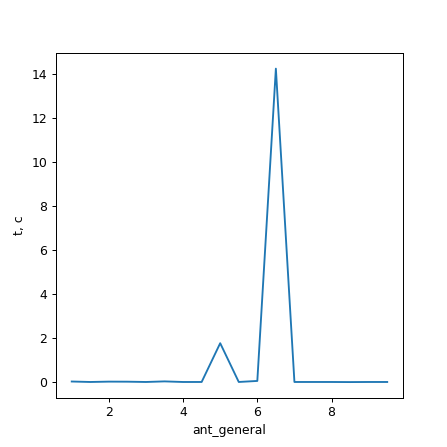

<function __main__.graph(t_list, name)>

In [421]:
graph(t_general, "ant_general")


**Хочется отменить, что при достижении alpha и beta=6.5, алгоритм начинает жутко тупить.**
![Ttile](https://imgur.com/y0zLbpN.png)
![Ttile](https://imgur.com/S34CkJo.png)
![Ttile](https://imgur.com/C45I2zo.png)

**Вывод:**

Использование различных вариаций муравьиного алгоритма позволяет решить задачу коммивояжера со значительной экономией по времени, нежели полным перебором, указав необходимую точность решения можно быстро её достичь.
Феромон используется муравьями чтоб найти оптимальный путь, а его испарение динамически изменяет поведение муравья.

Если alpha->0, то алгоритм становится "жадным" (только оптимальные или самые короткие расстояния). 

Если beta b->0, то учитываться только след феромона, что может привести к сужению пространства поиска оптимального решения